In [26]:
import numpy as np
import pandas as pd

#Import models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

#Import error calculators
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [27]:
#Retrieve data file from google drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/CurrentPopulationSurvey.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#Select variables from data and filter by year
df = df[["year","sex","age","marst","sch","statefip","race","realhrwage"]]
df = df[df["year"]==2013]

In [29]:
#Grouping the data and finding the mean
df_gap = df.groupby(by=["year","sex","age", "marst", "sch", "statefip","race"]).mean().reset_index()

#One hot encoding
y = pd.get_dummies(df_gap.statefip, prefix='State')
z = pd.get_dummies(df_gap.race,prefix="Race")
x = pd.get_dummies(df_gap.marst, prefix='Marst')

#Adding new clumns
df_gap = pd.concat([df_gap, y], sort=False, axis=1)
df_gap = pd.concat([df_gap, z], sort=False, axis=1)
df_gap = pd.concat([df_gap, x], sort=False, axis=1)
display(df_gap)

#Splitting dataset
df_female = df_gap.loc[df_gap['sex'] == 2]
df_male = df_gap.loc[df_gap['sex'] == 1]

#Creating id
df_female["id"] = df_female["year"].astype(str)+ df_female["marst"].astype(str)+ df_female["age"].astype(str) + df_female["sch"].astype(str)+ df_female["statefip"].astype(str)+ df_female["race"].astype(str)
df_male["id"] = df_male["year"].astype(str)+ df_male["marst"].astype(str)+df_male["age"].astype(str) + df_male["sch"].astype(str)+ df_male["statefip"].astype(str)+ df_male["race"].astype(str)

#Sorting by id
df_female = df_female.sort_values(['id'])
df_male = df_male.sort_values(['id'])
df_female = df_female.reset_index()
df_male = df_male.reset_index()
display(df_female)
display(df_male)

,year,sex,age,marst,sch,statefip,race,realhrwage,State_1,State_2,...,Race_1,Race_2,Race_3,Race_4,Marst_1,Marst_2,Marst_3,Marst_4,Marst_5,Marst_6
0,2013,1,25,1,2.5,34,3,8.298333,0,0,...,0,0,1,0,1,0,0,0,0,0
1,2013,1,25,1,5.5,35,3,4.610186,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2013,1,25,1,5.5,48,3,11.064445,0,0,...,0,0,1,0,1,0,0,0,0,0
3,2013,1,25,1,7.5,8,3,10.142408,0,0,...,0,0,1,0,1,0,0,0,0,0
4,2013,1,25,1,7.5,10,1,13.830556,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,2013,2,64,6,16.0,45,1,27.661112,0,0,...,1,0,0,0,0,0,0,0,0,1
36739,2013,2,64,6,18.0,6,1,83.559608,0,0,...,1,0,0,0,0,0,0,0,0,1
36740,2013,2,64,6,18.0,11,1,59.932411,0,0,...,1,0,0,0,0,0,0,0,0,1
36741,2013,2,64,6,18.0,21,3,23.050928,0,0,...,0,0,1,0,0,0,0,0,0,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,year,sex,age,marst,sch,statefip,race,realhrwage,State_1,...,Race_2,Race_3,Race_4,Marst_1,Marst_2,Marst_3,Marst_4,Marst_5,Marst_6,id
0,18079,2013,2,25,1,10.0,19,4,12.123471,0,...,0,0,1,1,0,0,0,0,0,201312510.0194
1,18080,2013,2,25,1,11.0,45,1,14.406830,0,...,0,0,0,1,0,0,0,0,0,201312511.0451
2,18081,2013,2,25,1,11.0,55,1,8.605680,0,...,0,0,0,1,0,0,0,0,0,201312511.0551
3,18089,2013,2,25,1,12.0,12,3,6.638667,0,...,0,1,0,1,0,0,0,0,0,201312512.0123
4,18090,2013,2,25,1,12.0,18,1,8.759352,0,...,0,0,0,1,0,0,0,0,0,201312512.0181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,36740,2013,2,64,6,18.0,11,1,59.932411,0,...,0,0,0,0,0,0,0,0,1,201366418.0111
18664,36741,2013,2,64,6,18.0,21,3,23.050928,0,...,0,1,0,0,0,0,0,0,1,201366418.0213
18665,36742,2013,2,64,6,18.0,24,1,35.959446,0,...,0,0,0,0,0,0,0,0,1,201366418.0241
18666,36739,2013,2,64,6,18.0,6,1,83.559608,0,...,0,0,0,0,0,0,0,0,1,201366418.061


,index,year,sex,age,marst,sch,statefip,race,realhrwage,State_1,...,Race_2,Race_3,Race_4,Marst_1,Marst_2,Marst_3,Marst_4,Marst_5,Marst_6,id
0,5,2013,1,25,1,10.0,6,3,11.986483,0,...,0,1,0,1,0,0,0,0,0,201312510.063
1,7,2013,1,25,1,11.0,18,3,11.986483,0,...,0,1,0,1,0,0,0,0,0,201312511.0183
2,8,2013,1,25,1,11.0,32,3,5.993241,0,...,0,1,0,1,0,0,0,0,0,201312511.0323
3,9,2013,1,25,1,11.0,39,1,12.908519,0,...,0,0,0,1,0,0,0,0,0,201312511.0391
4,6,2013,1,25,1,11.0,4,3,10.654651,0,...,0,1,0,1,0,0,0,0,0,201312511.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18070,18070,2013,1,64,6,16.0,33,1,33.193333,0,...,0,0,0,0,0,0,0,0,1,201366416.0331
18071,18072,2013,1,64,6,18.0,36,1,8.298333,0,...,0,0,0,0,0,0,0,0,1,201366418.0361
18072,18073,2013,1,64,6,18.0,51,1,22.480143,0,...,0,0,0,0,0,0,0,0,1,201366418.0511
18073,18074,2013,1,64,6,18.0,55,1,121.767433,0,...,0,0,0,0,0,0,0,0,1,201366418.0551


In [30]:
#Merge the datasets by matching  id
df_merge = pd.merge(df_female,df_male,on=["id"],how="inner")

#Calculate the gap
df_merge["gap"]=df_merge["realhrwage_y"]-df_merge["realhrwage_x"]

#Drop unnecessary variables
df_merge.drop(["index_x","id","index_y","year_y","sex_y","age_y","marst_y","sch_y","statefip_x","statefip_y","race_y","race_x","marst_x","year_x","sex_x","State_1_x","State_2_x","State_4_x","State_5_x","State_6_x","State_8_x","State_9_x","State_10_x","State_11_x","State_12_x","State_13_x","State_15_x","State_16_x","State_17_x","State_18_x","State_19_x","State_20_x","State_21_x","State_22_x","State_23_x","State_24_x","State_25_x","State_26_x","State_27_x","State_28_x","State_29_x","State_30_x","State_31_x","State_32_x","State_33_x","State_34_x","State_35_x","State_36_x","State_37_x","State_38_x","State_39_x","State_40_x","State_41_x","State_42_x","State_44_x","State_45_x","State_46_x","State_47_x","State_48_x","State_49_x","State_50_x","State_51_x","State_53_x","State_54_x","State_55_x","State_56_x","Race_1_x","Race_2_x","Race_3_x","Race_4_x","Marst_1_x","Marst_2_x","Marst_3_x","Marst_4_x","Marst_5_x","Marst_6_x"],axis=1,inplace=True)
display(df_merge)
df_merge.columns

,age_x,sch_x,realhrwage_x,realhrwage_y,State_1_y,State_2_y,State_4_y,State_5_y,State_6_y,State_8_y,...,Race_2_y,Race_3_y,Race_4_y,Marst_1_y,Marst_2_y,Marst_3_y,Marst_4_y,Marst_5_y,Marst_6_y,gap
0,25,12.0,15.221295,13.830556,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-1.390739
1,25,12.0,12.908519,13.432851,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.524332
2,25,12.0,15.367285,12.007925,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-3.359360
3,25,12.0,4.478466,16.596666,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,12.118201
4,25,12.0,13.830556,21.277779,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7.447223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,62,18.0,31.607433,50.712040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19.104607
6962,62,18.0,46.101856,65.164604,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,19.062748
6963,63,14.0,39.954941,9.220371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-30.734570
6964,64,13.0,44.257782,12.447500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-31.810282


Index(['age_x', 'sch_x', 'realhrwage_x', 'realhrwage_y', 'State_1_y',
       'State_2_y', 'State_4_y', 'State_5_y', 'State_6_y', 'State_8_y',
       'State_9_y', 'State_10_y', 'State_11_y', 'State_12_y', 'State_13_y',
       'State_15_y', 'State_16_y', 'State_17_y', 'State_18_y', 'State_19_y',
       'State_20_y', 'State_21_y', 'State_22_y', 'State_23_y', 'State_24_y',
       'State_25_y', 'State_26_y', 'State_27_y', 'State_28_y', 'State_29_y',
       'State_30_y', 'State_31_y', 'State_32_y', 'State_33_y', 'State_34_y',
       'State_35_y', 'State_36_y', 'State_37_y', 'State_38_y', 'State_39_y',
       'State_40_y', 'State_41_y', 'State_42_y', 'State_44_y', 'State_45_y',
       'State_46_y', 'State_47_y', 'State_48_y', 'State_49_y', 'State_50_y',
       'State_51_y', 'State_53_y', 'State_54_y', 'State_55_y', 'State_56_y',
       'Race_1_y', 'Race_2_y', 'Race_3_y', 'Race_4_y', 'Marst_1_y',
       'Marst_2_y', 'Marst_3_y', 'Marst_4_y', 'Marst_5_y', 'Marst_6_y', 'gap'],
      dtype='objec

(0.0, 150.0)

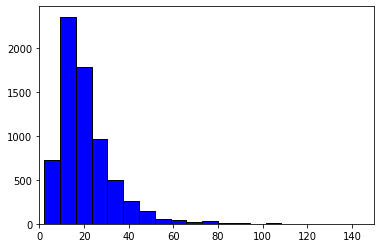

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(df_merge['realhrwage_x'], color = 'blue', edgecolor = 'black',
         bins = int(180/1))
plt.xlim(xmax=150)
plt.xlim(xmin=0)

In [32]:
#Categorize the realhrwage_x variable
def threshold_x(row):  
    if row['realhrwage_x'] > 0 and row['realhrwage_x'] <= 10:
        return 1
    elif row['realhrwage_x'] > 10 and row['realhrwage_x'] <= 20:
        return 2
    elif row['realhrwage_x'] > 20 and row['realhrwage_x'] <= 30:
        return 3
    elif row['realhrwage_x'] > 30 and row['realhrwage_x'] <= 40:
        return 4
    elif row['realhrwage_x'] > 40 and row['realhrwage_x'] <= 50:
        return 5
    elif row['realhrwage_x'] > 50 and row['realhrwage_x'] <= 60:
        return 6
    elif row['realhrwage_x'] > 60 and row['realhrwage_x'] <= 70:
        return 7
    elif row['realhrwage_x'] > 70 and row['realhrwage_x'] <= 80:
        return 8
    elif row['realhrwage_x'] > 80 and row['realhrwage_x'] <= 90:
        return 9
    elif row['realhrwage_x'] > 90 and row['realhrwage_x'] <= 100:
        return 10
    return 11
df_merge['realhrwage_category_x'] = df_merge.apply(lambda row: threshold_x(row), axis=1)
df_merge['realhrwage_squared']=df_merge['realhrwage_category_x']**2
# df_merge['realhrwage_category_y'] = df_merge.apply(lambda row: threshold_y(row), axis=1)
#Normalize the gap variable
from sklearn.preprocessing import MinMaxScaler
df_merge["gap_normalized"] = MinMaxScaler().fit_transform(np.array(df_merge["gap"]).reshape(-1,1))
df_merge.columns

Index(['age_x', 'sch_x', 'realhrwage_x', 'realhrwage_y', 'State_1_y',
       'State_2_y', 'State_4_y', 'State_5_y', 'State_6_y', 'State_8_y',
       'State_9_y', 'State_10_y', 'State_11_y', 'State_12_y', 'State_13_y',
       'State_15_y', 'State_16_y', 'State_17_y', 'State_18_y', 'State_19_y',
       'State_20_y', 'State_21_y', 'State_22_y', 'State_23_y', 'State_24_y',
       'State_25_y', 'State_26_y', 'State_27_y', 'State_28_y', 'State_29_y',
       'State_30_y', 'State_31_y', 'State_32_y', 'State_33_y', 'State_34_y',
       'State_35_y', 'State_36_y', 'State_37_y', 'State_38_y', 'State_39_y',
       'State_40_y', 'State_41_y', 'State_42_y', 'State_44_y', 'State_45_y',
       'State_46_y', 'State_47_y', 'State_48_y', 'State_49_y', 'State_50_y',
       'State_51_y', 'State_53_y', 'State_54_y', 'State_55_y', 'State_56_y',
       'Race_1_y', 'Race_2_y', 'Race_3_y', 'Race_4_y', 'Marst_1_y',
       'Marst_2_y', 'Marst_3_y', 'Marst_4_y', 'Marst_5_y', 'Marst_6_y', 'gap',
       'realhrwage_

In [33]:
#Define x and y
y=df_merge["gap_normalized"]
x=df_merge[df_merge.columns[~df_merge.columns.isin(['gap','gap_normalized','realhrwage_x','realhrwage_y','State_1_y',
       'State_2_y', 'State_4_y', 'State_5_y', 'State_6_y', 'State_8_y',
       'State_9_y', 'State_10_y', 'State_11_y', 'State_12_y', 'State_13_y',
       'State_15_y', 'State_16_y', 'State_17_y', 'State_18_y', 'State_19_y',
       'State_20_y', 'State_21_y', 'State_22_y', 'State_23_y', 'State_24_y',
       'State_25_y', 'State_26_y', 'State_27_y', 'State_28_y', 'State_29_y',
       'State_30_y', 'State_31_y', 'State_32_y', 'State_33_y', 'State_34_y',
       'State_35_y', 'State_36_y', 'State_37_y', 'State_38_y', 'State_39_y',
       'State_40_y', 'State_41_y', 'State_42_y', 'State_44_y', 'State_45_y',
       'State_46_y', 'State_47_y', 'State_48_y', 'State_49_y', 'State_50_y',
       'State_51_y', 'State_53_y', 'State_54_y', 'State_55_y', 'State_56_y'])]]
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

#Train Linear Regression
reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_test)

#Get automatic parameters
print(reg.get_params())

#Define min and max
min = df_merge["gap"].to_numpy().min()
max = df_merge["gap"].to_numpy().max()

#Define function
def denorm(numpy_array, min, max):
  return (numpy_array*(max-min)+min)

#apply function of denormalization
d_y_test = denorm(y_test, min, max)
d_preds = denorm(preds, min, max)

#Convert arrays into pandas data frames
df_y_test= pd.DataFrame(d_y_test)
df_preds= pd.DataFrame(d_preds)

#Evaluate errors
print(np.sqrt(mean_squared_error(df_y_test, df_preds)))
print(mean_absolute_error(df_y_test, df_preds))
print(r2_score(df_y_test,df_preds))

#Reset index to avoid bad concatenation
df_y_test.reset_index(inplace=True)
df_preds.reset_index(inplace=True)

#Concatenate predicitons and testing labels
df_comparison = pd.concat([df_y_test,df_preds], axis=1, ignore_index=True)
df_comparison.drop(df_comparison.columns[[0, 2]],axis = 1, inplace=True)

#Rename columns
mapping = {df_comparison.columns[0]: 'y_test', df_comparison.columns[1]: 'predictions'}
df_comparison = df_comparison.rename(columns=mapping)

#Show pandas dataframe of comparison
df_comparison.head(20)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
19.832005650379337
11.578408720561118
0.353883766554533


,y_test,predictions
0,15.851585,14.256482
1,7.327768,17.953115
2,-7.626929,16.972811
3,17.057685,3.615001
4,-38.578463,-72.707948
5,1.091854,3.861940
6,-5.504416,5.136003
7,4.517982,11.082898
8,5.762733,20.480844
9,16.526522,19.196299


Coefficients: 
 [ 0.00015626  0.00176964  0.00131286 -0.00222612 -0.0005703   0.00148356
 -0.00213994  0.01808727 -0.00443371 -0.00336512 -0.00337529 -0.00477321
  0.00031349 -0.00085044]
[ 0.00015626  0.00176964  0.00131286 -0.00222612 -0.0005703   0.00148356
 -0.00213994  0.01808727 -0.00443371 -0.00336512 -0.00337529 -0.00477321
  0.00031349 -0.00085044]
0.7660229804261841


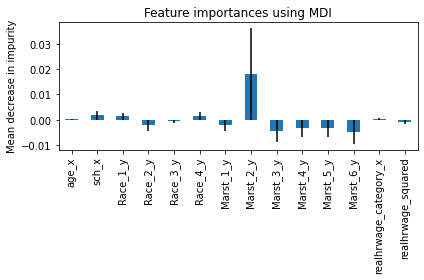

In [34]:
#Evaluate importances
coef = reg.coef_
intercept = reg.intercept_
print("Coefficients: \n", reg.coef_)
print(coef)
print(intercept)

#Plotting
coef_plot = pd.Series(coef, index=X_train.columns)
std = np.std([reg.coef_ for tree in reg.coef_], axis=0)
fig, ax = plt.subplots()
coef_plot.plot.bar(yerr=reg.coef_, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



,coefficients
Marst_2_y,0.018087
sch_x,0.001770
Race_4_y,0.001484
Race_1_y,0.001313
realhrwage_category_x,0.000313
age_x,0.000156
Race_3_y,-0.000570
realhrwage_squared,-0.000850
Marst_1_y,-0.002140
Race_2_y,-0.002226


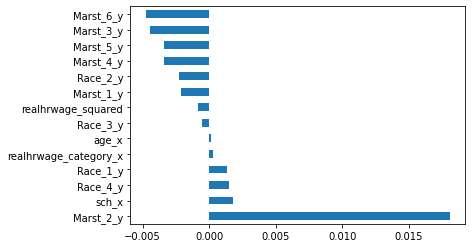

In [35]:
#Absolute values
coef = {}                                           
for coefficient, importance in zip(x.columns, reg.coef_):
    coef[coefficient] = importance
coefficient = pd.DataFrame.from_dict(coef, orient='index').rename(columns={0:'coefficients'})
coef_plot.nlargest(14).plot(kind='barh')
coefficient= coefficient.sort_values(by='coefficients', ascending = False)
coefficient.head(20)

20.149615057136735
11.798364363401147
0.33302295839990026


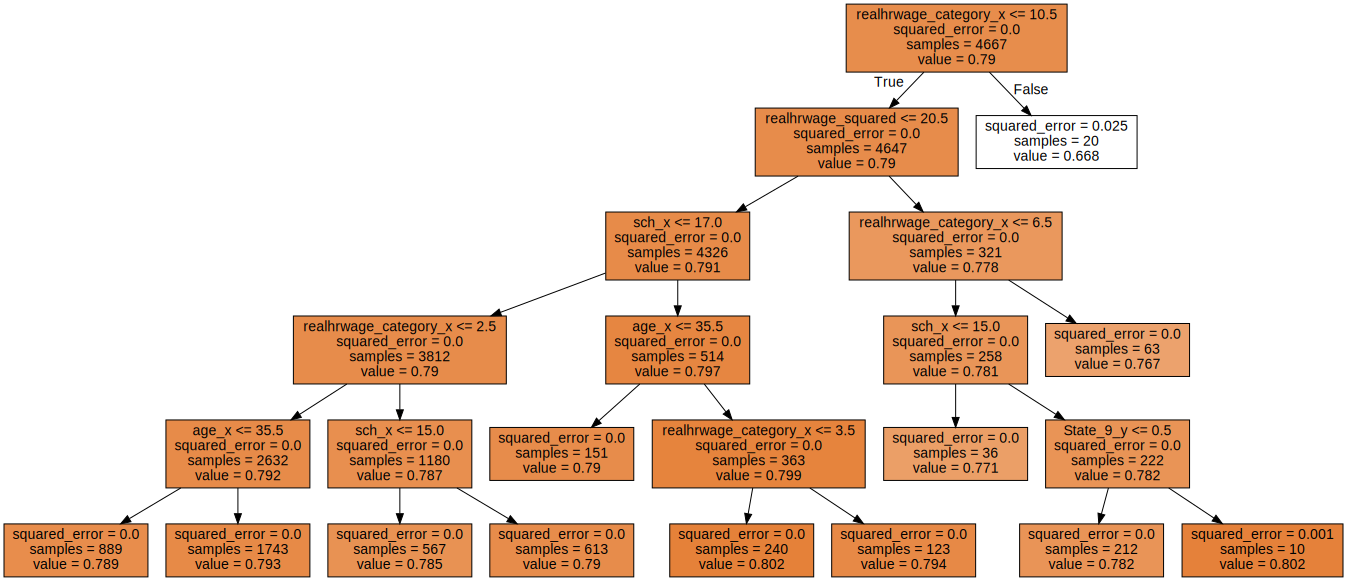

In [36]:
#Define x and y
y=df_merge["gap_normalized"]
x=df_merge[df_merge.columns[~df_merge.columns.isin(['gap_normalized','gap','realhrwage_x','realhrwage_y'])]]
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

#Train Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=0, min_samples_split = 200, max_depth=5).fit(X_train, y_train)
preds = reg.predict(X_test)

#Define min and max
min = df_merge["gap"].to_numpy().min()
max = df_merge["gap"].to_numpy().max()

#Define function
def denorm(numpy_array, min, max):
  return (numpy_array*(max-min)+min)

#Apply function of denormalization
d_y_test= denorm(y_test, min, max)
d_preds = denorm(preds, min, max)

#Convert arrays into pandas data frames
df_y_test= pd.DataFrame(d_y_test)
df_preds= pd.DataFrame(d_preds)

#Evaluate errors
print(np.sqrt(mean_squared_error(df_y_test, df_preds)))
print(mean_absolute_error(df_y_test, df_preds))
print(r2_score(df_y_test,df_preds))

#Reset index to avoid bad concatenation
df_y_test.reset_index(inplace=True)
df_preds.reset_index(inplace=True)

#Concatenate predicitons and testing labels
df_comparison = pd.concat([df_y_test,df_preds], axis=1, ignore_index=True)
df_comparison.drop(df_comparison.columns[[0, 2]],axis = 1, inplace=True)

#Rename columns
mapping = {df_comparison.columns[0]: 'y_test', df_comparison.columns[1]: 'predictions'}
df_comparison = df_comparison.rename(columns=mapping)

#Show pandas dataframe of comparison
df_comparison.head(20)

import graphviz
from sklearn import tree
#DOT data
dot_data = tree.export_graphviz(reg,feature_names=X_train.columns, out_file=None,
                                filled=True)

#Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


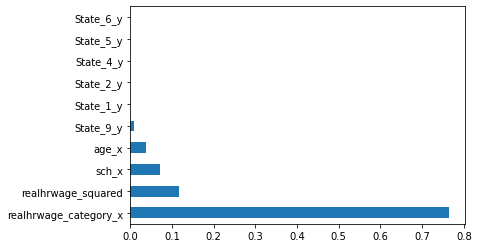

In [37]:
#Plot importances
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')


In [38]:
import matplotlib.pyplot as plt

#Define x and y
y=df_merge["gap_normalized"]
x=df_merge[df_merge.columns[~df_merge.columns.isin(['gap_normalized','gap','realhrwage_x','realhrwage_y'])]]
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

#Train Random Forest Regressor
reg = RandomForestRegressor(random_state=0,min_samples_split = 250, max_depth=5, n_estimators = 20).fit(X_train, y_train)
preds = reg.predict(X_test)

#Evaluate importances
importances = reg.feature_importances_
print(importances)

#Define min and max
min = df_merge["gap"].to_numpy().min()
max = df_merge["gap"].to_numpy().max()

#Define function
def denorm(numpy_array, min, max):
  return (numpy_array*(max-min)+min)

#Apply function of denormalization
d_y_test= denorm(y_test, min, max)
d_preds = denorm(preds, min, max)

#Convert arrays into pandas data frames
df_y_test= pd.DataFrame(d_y_test)
df_preds= pd.DataFrame(d_preds)

#Evaluate errors
print(np.sqrt(mean_squared_error(df_y_test, df_preds)))
print(mean_absolute_error(df_y_test, df_preds))
print(r2_score(df_y_test,df_preds))

#Reset index to avoid bad concatenation
df_y_test.reset_index(inplace=True)
df_preds.reset_index(inplace=True)

#Concatenate predicitons and testing labels
df_comparison = pd.concat([df_y_test,df_preds], axis=1, ignore_index=True)
df_comparison.drop(df_comparison.columns[[0, 2]],axis = 1, inplace=True)

#Rename columns
mapping = {df_comparison.columns[0]: 'y_test', df_comparison.columns[1]: 'predictions'}
df_comparison = df_comparison.rename(columns=mapping)

#Show pandas dataframe of comparison
df_comparison.head(20)



[2.76320197e-02 6.45991987e-02 0.00000000e+00 7.34934394e-03
 0.00000000e+00 0.00000000e+00 4.35988654e-04 0.00000000e+00
 3.02050916e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.91561201e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.47335962e-04 0.00000000e+00 0.00000000e+00
 2.53821647e-03 2.10683697e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.58570337e-03 4.87054847e-01
 3.99614388e-01]
20.1231

,y_test,predictions
0,15.851585,10.181518
1,7.327768,9.822287
2,-7.626929,10.181518
3,17.057685,8.111230
4,-38.578463,-14.031960
5,1.091854,8.111230
6,-5.504416,8.460067
7,4.517982,10.181518
8,5.762733,16.485028
9,16.526522,18.629873


,importance
realhrwage_category_x,0.487055
realhrwage_squared,0.399614
sch_x,0.064599
age_x,0.027632
State_2_y,0.007349
Marst_6_y,0.003586
State_9_y,0.003021
Race_4_y,0.002538
Marst_1_y,0.002107
State_33_y,0.001916


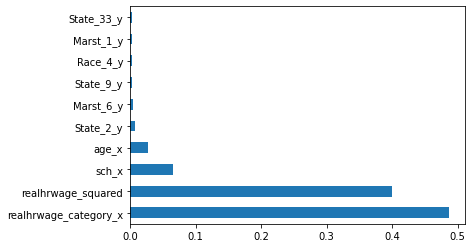

In [39]:
#Plotting importances
feats = {}                                           
for feature, importance in zip(x.columns, reg.feature_importances_):
    feats[feature] = importance 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'importance'})
forest_importances.nlargest(10).plot(kind='barh')
importances= importances.sort_values(by='importance', ascending = False)
importances.head(20)

In [40]:
#Define x and y
y=df_merge["gap_normalized"]
x=df_merge[df_merge.columns[~df_merge.columns.isin(['gap_normalized','gap','realhrwage_x','realhrwage_y'])]]
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

#Train KNeighbors Regressor
reg = KNeighborsRegressor(n_neighbors=4).fit(X_train, y_train)
preds = reg.predict(X_test)

#Define min and max
min = df_merge["gap"].to_numpy().min()
max = df_merge["gap"].to_numpy().max()

#Define function
def denorm(numpy_array, min, max):
  return (numpy_array*(max-min)+min)

#apply function of denormalization
d_y_test = denorm(y_test, min, max)
d_preds = denorm(preds, min, max)

#Convert arrays into pandas data frames
df_y_test= pd.DataFrame(d_y_test)
df_preds= pd.DataFrame(d_preds)

#Evaluate errors
print(np.sqrt(mean_squared_error(df_y_test, df_preds)))
print(mean_absolute_error(df_y_test, df_preds))
print(r2_score(df_y_test,df_preds))

#Reset index to avoid bad concatenation
df_y_test.reset_index(inplace=True)
df_preds.reset_index(inplace=True)

#Concatenate predicitons and testing labels
df_comparison = pd.concat([df_y_test,df_preds], axis=1, ignore_index=True)
df_comparison.drop(df_comparison.columns[[0, 2]],axis = 1, inplace=True)

#Rename columns
mapping = {df_comparison.columns[0]: 'y_test', df_comparison.columns[1]: 'predictions'}
df_comparison = df_comparison.rename(columns=mapping)

#Show pandas dataframe of comparison
df_comparison.head(20)

22.602268092431466
12.557100422538726
0.16076918586557942


,y_test,predictions
0,15.851585,7.133666
1,7.327768,10.789925
2,-7.626929,21.827576
3,17.057685,0.847833
4,-38.578463,-26.245380
5,1.091854,-0.892310
6,-5.504416,1.790289
7,4.517982,11.392904
8,5.762733,16.822283
9,16.526522,18.524415


In [41]:
#Define x and y
y=df_merge["gap_normalized"]
x=df_merge[df_merge.columns[~df_merge.columns.isin(['gap_normalized','gap','realhrwage_x','realhrwage_y'])]]
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

#Train MLP Regressor
reg = MLPRegressor(random_state=0, max_iter=1000, hidden_layer_sizes= (5,10)).fit(X_train, y_train)
preds = reg.predict(X_test)

#Define min and max
min = df_merge["gap"].to_numpy().min()
max = df_merge["gap"].to_numpy().max()

#Define function
def denorm(numpy_array, min, max):
  return (numpy_array*(max-min)+min)

#apply function of denormalization
d_y_test = denorm(y_test, min, max)
d_preds = denorm(preds, min, max)

#Convert arrays into pandas data frames
df_y_test= pd.DataFrame(d_y_test)
df_preds= pd.DataFrame(d_preds)

#Evaluate errors
print(np.sqrt(mean_squared_error(df_y_test, df_preds)))
print(mean_absolute_error(df_y_test, df_preds))
print(r2_score(df_y_test,df_preds))

#Reset index to avoid bad concatenation
df_y_test.reset_index(inplace=True)
df_preds.reset_index(inplace=True)

#Concatenate predicitons and testing labels
df_comparison = pd.concat([df_y_test,df_preds], axis=1, ignore_index=True)
df_comparison.drop(df_comparison.columns[[0, 2]],axis = 1, inplace=True)

#Rename columns
mapping = {df_comparison.columns[0]: 'y_test', df_comparison.columns[1]: 'predictions'}
df_comparison = df_comparison.rename(columns=mapping)

#Show pandas dataframe of comparison
df_comparison.head(20)

124.36927298770938
75.30717738761085
-24.409935867897286


,y_test,predictions
0,15.851585,46.072422
1,7.327768,-16.920541
2,-7.626929,73.255342
3,17.057685,-131.482958
4,-38.578463,-417.957898
5,1.091854,-138.972073
6,-5.504416,-77.601306
7,4.517982,113.941382
8,5.762733,1.751947
9,16.526522,44.418105
